In [1]:
import numpy as np
from astropy.io import ascii, fits
from ants import fluxInt
import pyregion
import aplpy

from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LogLocator
from matplotlib import transforms as mtransforms
from matplotlib.ticker import LogFormatter 
from matplotlib.colors import LogNorm


fl = fluxInt.fluxint()

get_ipython().magic(u'pylab inline')


#home = '/Users/'
home = '/home/'

#directories
rootDir = home+'maccagni/Projects/MFS/FornaxA/centreHI/moments/'
contDir = home+'maccagni/Projects/MFS/FornaxA/centreHI/continuum/'
plotDir = home+'maccagni/Projects/MFS/FornaxA/centreHI/plots/momPlots/'

#continuum
contName = home+'maccagni/Projects/MFS/FornaxA/centreHI/cont_16asec.fits'
contNameHighRes = home+'maccagni/Projects/MFS/FornaxA/centreHI/M64_FA_UF_2-MFS-image.fits'

#moments HI
mom020asec = rootDir+ 'mom0_20asec.fits'
mom010asec = rootDir+ 'mom0_10asec.fits'

nhi20asec = rootDir+ 'mom0_NHI_20asec.fits'
nhi10asec = rootDir+ 'mom0_NHI_10asec.fits'

mhi20asec = rootDir+ 'surfBright_20asec.fits'
mhi10asec = rootDir+ 'surfBright_10asec.fits'


FA_radeg = 50.67375
FA_decdeg = -37.2083
BeamRa = 50.699035
BeamDec =-37.228974


#Outputs

print '''\n\t+---------+\n\t Inputs loaded\n\t+---------+'''

Populating the interactive namespace from numpy and matplotlib

	+---------+
	 Inputs loaded
	+---------+


/home/maccagni/programs/anaconda/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/maccagni/programs/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
#----------------------#
# rc param initialize
#----------------------#
params = {'figure.figsize'      : '10,10',
          'font.family'         :' serif',
          'font.serif'          :'times',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 24,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 3,
          'xtick.labelsize'     : 22,
          'ytick.labelsize'     : 22, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 6,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 3,
          'xtick.minor.width'   : 1,
          'ytick.major.size'    : 6,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 3,
          'ytick.minor.width'   : 1, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)

print '''\n\t+---------+\n\t Matplotlib initialized\n\t+---------+'''


	+---------+
	 Matplotlib initialized
	+---------+


## HI moment  maps

- noise in the 10 arcsecond input cube is: 0.09 mJy beam$^{-1}$
- noise in the 20 arcescond input cube is: 0.1 mJy beam$^{-1}$

- channel width is 44.106 km s$^{-1}$

- contour levels should be plotted as $3/\sigma\times2^n$ where $n=0,1,2,...$. 

  - Contour levels for mom0 maps are:
    - **10 asec**: 12 (11.88), 24, 48, 96 mJy beam km s$^{-1}$
    - **10 asec**: 9.485, 18.97, 37.94, 75.89 $\times 10^{19}$ cm$^{-2}$
      - (to convert to column density multiply for 7.90469073568e+18)
    - **20 asec**: 13 (13.20), 26, 52, 104, 208, 416 mJy beam km s$^{-1}$
    - **20 asec**: 3.158, 6.316, 12.63, 25.26, 50.53, 101.2 $\times 10^{19}$ cm$^{-2}$
      - (to convert to column density multiply for 2.429222983e+18)
      
- in the 20 asec column density map comparable contours are 8, 16, 32$\sigma$


BMAJ	13.541177
BMIN	10.426125

	+---------+
	 mom0 HI 10asec
	 Done
	+---------+


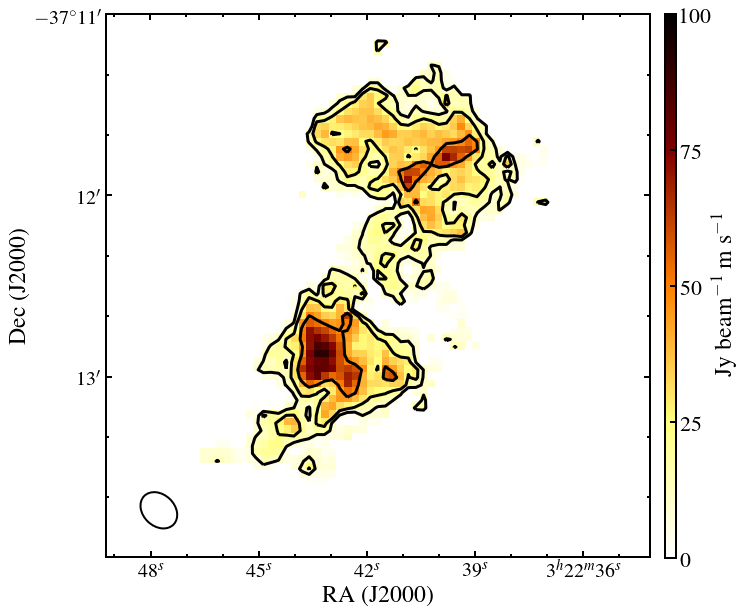

In [7]:
#----------------------#
# mom0 10asec
#----------------------#
outPlot_10asec = plotDir+'mom0_10asec.pdf'
imageName = mom010asec
fig = plt.figure()

f22 = fits.getdata(imageName, ext=0)
h22 = fits.getheader(imageName, ext=0)

img = plt.imshow(f22, cmap="afmhot_r",vmin=0,vmax=100)
plt.gca().set_visible(False)
cax = plt.axes([0.912, 0.124, 0.015, 0.755])
cbar = plt.colorbar(cax=cax,ticks =  [0,25,50,75,100,125,150],
                    orientation='vertical', format='%.1d')
ax = cbar.ax
#ax.text(3.9,0.5,r'H$_2$/H$_{\rm I}$',rotation=90)
ax.text(4.1,0.6,r'Jy beam$^{-1}$ m s$^{-1}$',rotation=90)


#FA_radeg = 50.673825
#FA_decdeg = -37.204227
#BeamRa = 50.694035
#BeamDec = -37.220974
f1 = aplpy.FITSFigure(imageName, figure=fig)
f1.set_theme('publication')

f1.frame.set_linewidth(2)

f1.recenter(FA_radeg,FA_decdeg,width=0.05,height=0.05)
f1.show_colorscale(aspect='equal', cmap='afmhot_r',stretch = 'linear',vmin=0,vmax=100)



f1.show_contour(imageName,levels=[12, 24, 48, 96], colors='black')

f1.show_ellipses(BeamRa, BeamDec, h22['BMAJ'], h22['BMIN'], angle=h22['BPA'], edgecolor='black',linewidth=2 )


f1.axis_labels.set_font( weight='book',size='medium', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')
f1.axis_labels.set_xtext('RA (J2000)')
f1.axis_labels.set_ytext('Dec (J2000)')
f1.tick_labels.set_xformat('hh:mm:ss')
f1.tick_labels.set_yformat('dd:mm')
f1.tick_labels.set_font( weight='book', size='small',
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f1.ticks.set_color('k')
f1.ticks.set_length(6)  # points
f1.ticks.set_linewidth(2)  # points
f1.ticks.set_minor_frequency(3)
f1.ticks.show()

fig.savefig(outPlot_10asec,format='pdf',dpi=300,bbox_inches='tight',transparent=False,overwrite=True)


print('BMAJ\t{0:f}'.format(h22['BMAJ']*3600.))
print('BMIN\t{0:f}'.format(h22['BMIN']*3600.))

print '''\n\t+---------+\n\t mom0 HI 10asec\n\t Done\n\t+---------+'''

a string value was expected. [astropy.wcs.wcs]


BMAJ	23.919930
BMIN	19.205999

	+---------+
	 mom0 HI 20asec
	 Done
	+---------+


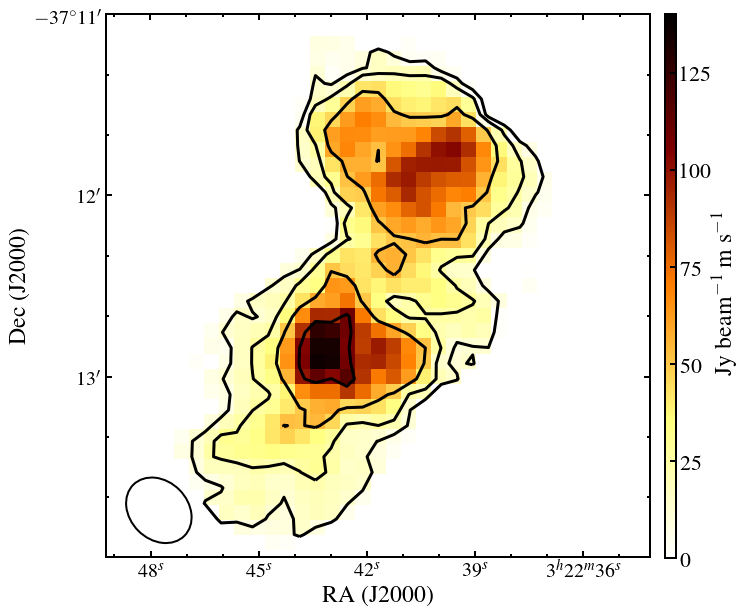

In [6]:
#----------------------#
# mom0 20asec
#----------------------#
outPlot_20asec = plotDir+'mom0_20asec.pdf'
imageName = mom020asec
fig = plt.figure()

f22 = fits.getdata(imageName, ext=0)
h22 = fits.getheader(imageName, ext=0)

img = plt.imshow(f22, cmap="afmhot_r",vmin=0,vmax=140)
plt.gca().set_visible(False)
cax = plt.axes([0.912, 0.124, 0.015, 0.755])
cbar = plt.colorbar(cax=cax,ticks =  [0,25,50,75,100,125,150],
                    orientation='vertical', format='%.1d')
ax = cbar.ax
ax.text(4.1,0.6,r'Jy beam$^{-1}$ m s$^{-1}$',rotation=90)

f1 = aplpy.FITSFigure(imageName, figure=fig)
f1.set_theme('publication')

f1.frame.set_linewidth(2)

f1.recenter(FA_radeg,FA_decdeg,width=0.05,height=0.05)
f1.show_colorscale(aspect='equal', cmap='afmhot_r',stretch = 'linear',vmin=0,vmax=140)

f1.show_contour(imageName,levels=[13, 26, 52, 104, 208, 416], colors='black')

f1.show_ellipses(BeamRa, BeamDec, h22['BMAJ'], h22['BMIN'], angle=h22['BPA'], edgecolor='black',linewidth=2 )


f1.axis_labels.set_font( weight='book',size='medium', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')
f1.axis_labels.set_xtext('RA (J2000)')
f1.axis_labels.set_ytext('Dec (J2000)')
f1.tick_labels.set_xformat('hh:mm:ss')
f1.tick_labels.set_yformat('dd:mm')
f1.tick_labels.set_font( weight='book', size='small',
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f1.ticks.set_color('k')
f1.ticks.set_length(6)  # points
f1.ticks.set_linewidth(2)  # points
f1.ticks.set_minor_frequency(3)
f1.ticks.show()

fig.savefig(outPlot_20asec,format='pdf',dpi=300,bbox_inches='tight',transparent=False,overwrite=True)


print('BMAJ\t{0:f}'.format(h22['BMAJ']*3600.))
print('BMIN\t{0:f}'.format(h22['BMIN']*3600.))

print '''\n\t+---------+\n\t mom0 HI 20asec\n\t Done\n\t+---------+'''

BMAJ	13.541177
BMIN	10.426125

	+---------+
	 NHI 10asec
	 Done
	+---------+


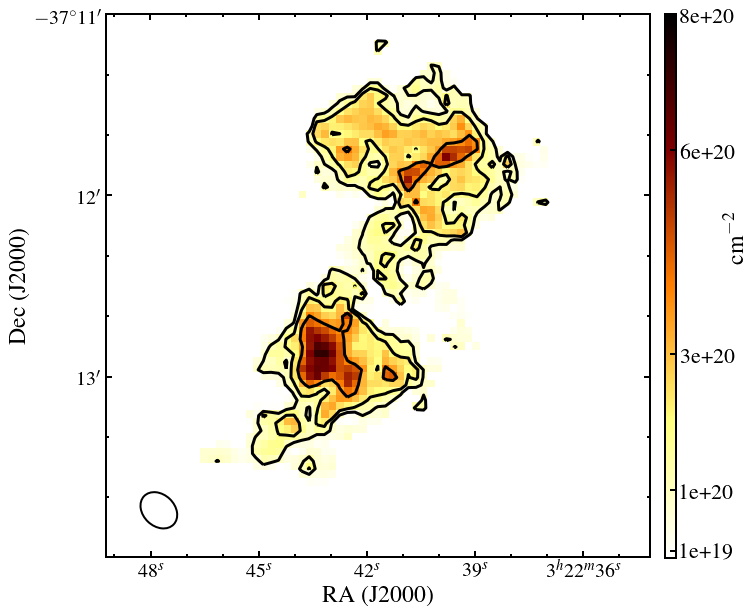

In [17]:
#----------------------#
# nhi 10asecOver20asec
#----------------------#
outPlot_10asec = plotDir+'mom0_NHI_10asec.pdf'
image10asec = nhi10asec

fig = plt.figure()

f22 = fits.getdata(image10asec, ext=0)
h22 = fits.getheader(image10asec, ext=0)

img = plt.imshow(f22, cmap="afmhot_r",vmin=0,vmax=8e20)
plt.gca().set_visible(False)
cax = plt.axes([0.912, 0.124, 0.015, 0.755])
cbar = plt.colorbar(cax=cax,ticks = [1e19,1e20,3e20,6e20,8e20],
                    orientation='vertical',format='%.0e')

ax = cbar.ax
ax.text(5.4,0.6,r'cm$^{-2}$',rotation=90)

f1 = aplpy.FITSFigure(image10asec, figure=fig)
f1.set_theme('publication')

f1.frame.set_linewidth(2)

f1.recenter(FA_radeg,FA_decdeg,width=0.05,height=0.05)
f1.show_colorscale(aspect='equal', cmap='afmhot_r',stretch = 'linear',vmin=0,vmax=8e20)

f1.show_contour(image10asec,levels=[9.485e19, 18.97e19, 37.94e19, 75.89e19], colors='black')

f1.show_ellipses(BeamRa, BeamDec, h22['BMAJ'], h22['BMIN'], angle=h22['BPA'], edgecolor='black',linewidth=2 )


f1.axis_labels.set_font( weight='book',size='medium', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')
f1.axis_labels.set_xtext('RA (J2000)')
f1.axis_labels.set_ytext('Dec (J2000)')
f1.tick_labels.set_xformat('hh:mm:ss')
f1.tick_labels.set_yformat('dd:mm')
f1.tick_labels.set_font( weight='book', size='small',
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f1.ticks.set_color('k')
f1.ticks.set_length(6)  # points
f1.ticks.set_linewidth(2)  # points
f1.ticks.set_minor_frequency(3)
f1.ticks.show()

fig.savefig(outPlot_10asec,format='pdf',dpi=300,bbox_inches='tight',transparent=False,overwrite=True)


print('BMAJ\t{0:f}'.format(h22['BMAJ']*3600.))
print('BMIN\t{0:f}'.format(h22['BMIN']*3600.))

print '''\n\t+---------+\n\t NHI 10asec\n\t Done\n\t+---------+'''

BMAJ	23.919930
BMIN	19.205999

	+---------+
	 NHI 20asec
	 Done
	+---------+


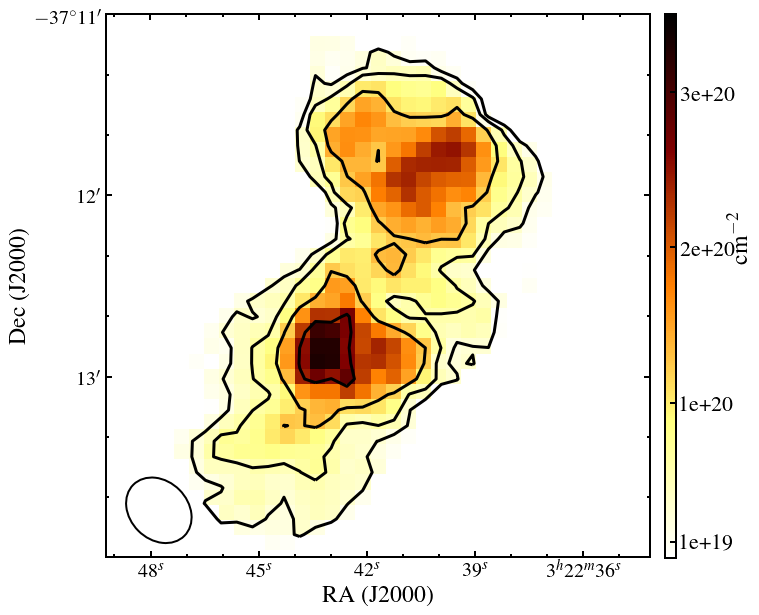

In [15]:
#----------------------#
# nhi 20asec
#----------------------#
outPlot_20asec = plotDir+'mom0_NHI_20asec.pdf'
imageName = nhi20asec
fig = plt.figure()

f22 = fits.getdata(imageName, ext=0)
h22 = fits.getheader(imageName, ext=0)

img = plt.imshow(f22, cmap="afmhot_r",vmin=0,vmax=3.5e20)
plt.gca().set_visible(False)
cax = plt.axes([0.912, 0.124, 0.015, 0.755])
cbar = plt.colorbar(cax=cax,ticks = [1e19,5e20,1e20,2e20,3e20],
                    orientation='vertical', format='%.0e')
ax = cbar.ax
ax.text(5.8,0.6,r'cm$^{-2}$',rotation=90)

f1 = aplpy.FITSFigure(imageName, figure=fig)
f1.set_theme('publication')

f1.frame.set_linewidth(2)

f1.recenter(FA_radeg,FA_decdeg,width=0.05,height=0.05)
f1.show_colorscale(aspect='equal', cmap='afmhot_r',stretch = 'linear',vmin=0,vmax=3.5e20)

f1.show_contour(imageName,levels=[3.158e19, 6.316e19, 12.63e19, 25.26e19, 50.53e19, 101.2e19], colors='black')

f1.show_ellipses(BeamRa, BeamDec, h22['BMAJ'], h22['BMIN'], angle=h22['BPA'], edgecolor='black',linewidth=2 )


f1.axis_labels.set_font( weight='book',size='medium', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')
f1.axis_labels.set_xtext('RA (J2000)')
f1.axis_labels.set_ytext('Dec (J2000)')
f1.tick_labels.set_xformat('hh:mm:ss')
f1.tick_labels.set_yformat('dd:mm')
f1.tick_labels.set_font( weight='book', size='small',
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f1.ticks.set_color('k')
f1.ticks.set_length(6)  # points
f1.ticks.set_linewidth(2)  # points
f1.ticks.set_minor_frequency(3)
f1.ticks.show()

fig.savefig(outPlot_20asec,format='pdf',dpi=300,bbox_inches='tight',transparent=False,overwrite=True)


print('BMAJ\t{0:f}'.format(h22['BMAJ']*3600.))
print('BMIN\t{0:f}'.format(h22['BMIN']*3600.))

print '''\n\t+---------+\n\t NHI 20asec\n\t Done\n\t+---------+'''

BMAJ	13.541177
BMIN	10.426125
BMAJ	13.541177
BMIN	10.426125

	+---------+
	 mom0 HI 10asec
	 Done
	+---------+


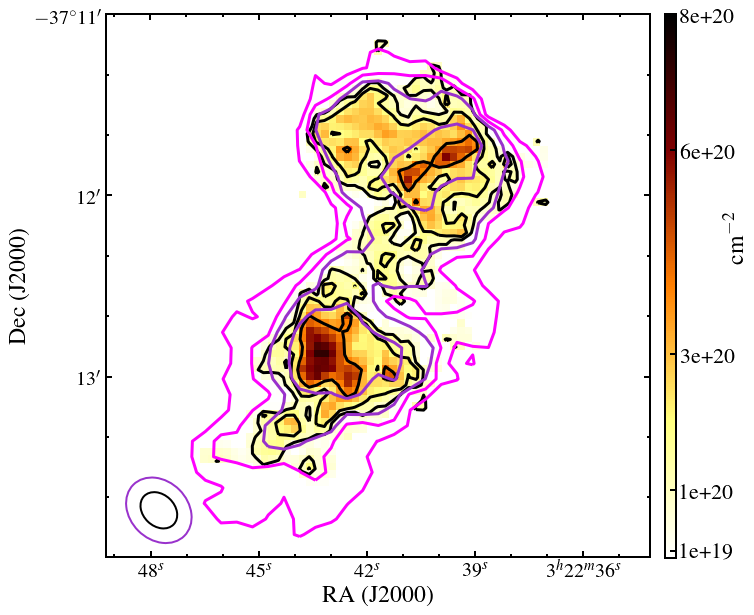

In [12]:
#----------------------#
# nhi 10asecOver20asec
#----------------------#
outPlot_10Ov20 = plotDir+'mom0_NHI_10asec20asec.pdf'
image10asec = nhi10asec
image20asec = nhi20asec

fig = plt.figure()

f22 = fits.getdata(image10asec, ext=0)
h22 = fits.getheader(image10asec, ext=0)
h24 = fits.getheader(image20asec, ext=0)

img = plt.imshow(f22, cmap="afmhot_r",vmin=0,vmax=8e20)
plt.gca().set_visible(False)
cax = plt.axes([0.912, 0.124, 0.015, 0.755])
cbar = plt.colorbar(cax=cax,ticks = [1e19,1e20,3e20,6e20,8e20],
                    orientation='vertical',format='%.0e')

ax = cbar.ax
ax.text(5.4,0.6,r'cm$^{-2}$',rotation=90)

f1 = aplpy.FITSFigure(image10asec, figure=fig)
f1.set_theme('publication')

f1.frame.set_linewidth(2)

f1.recenter(FA_radeg,FA_decdeg,width=0.05,height=0.05)
f1.show_colorscale(aspect='equal', cmap='afmhot_r',stretch = 'linear',vmin=0,vmax=8e20)

f1.show_contour(image10asec,levels=[9.485e19, 18.97e19, 37.94e19, 75.89e19], colors='black')
f1.show_contour(image20asec,levels=[9.485e19, 18.97e19, 37.94e19, 75.89e19], colors='darkorchid')
f1.show_contour(image20asec,levels=[3.158e19, 6.316e19],colors='magenta')

f1.show_ellipses(BeamRa, BeamDec, h22['BMAJ'], h22['BMIN'], angle=h22['BPA'], edgecolor='black',linewidth=2 )
f1.show_ellipses(BeamRa, BeamDec, h24['BMAJ'], h24['BMIN'], angle=h24['BPA'], edgecolor='darkorchid',linewidth=2 )


f1.axis_labels.set_font( weight='book',size='medium', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')
f1.axis_labels.set_xtext('RA (J2000)')
f1.axis_labels.set_ytext('Dec (J2000)')
f1.tick_labels.set_xformat('hh:mm:ss')
f1.tick_labels.set_yformat('dd:mm')
f1.tick_labels.set_font( weight='book', size='small',
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f1.ticks.set_color('k')
f1.ticks.set_length(6)  # points
f1.ticks.set_linewidth(2)  # points
f1.ticks.set_minor_frequency(3)
f1.ticks.show()

fig.savefig(outPlot_10Ov20,format='pdf',dpi=300,bbox_inches='tight',transparent=False,overwrite=True)


print('BMAJ\t{0:f}'.format(h22['BMAJ']*3600.))
print('BMIN\t{0:f}'.format(h22['BMIN']*3600.))

print('BMAJ\t{0:f}'.format(h22['BMAJ']*3600.))
print('BMIN\t{0:f}'.format(h22['BMIN']*3600.))

print '''\n\t+---------+\n\t mom0 HI 10asec\n\t Done\n\t+---------+'''

BMAJ	23.919930
BMIN	19.205999

	+---------+
	 NHI 20asec
	 Done
	+---------+


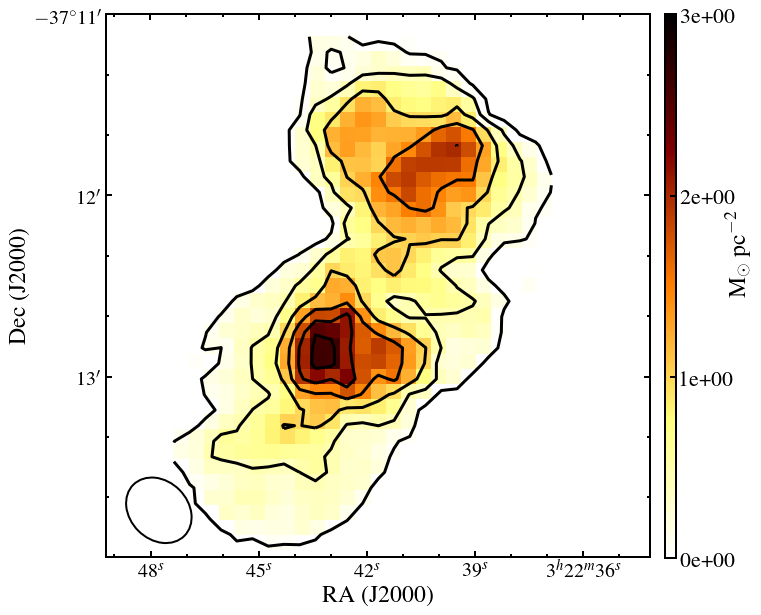

In [29]:
#----------------------#
# surface brightness 20asec
#----------------------#

outPlot_20asec = plotDir+'surfBright_20asec.pdf'
imageName = mhi20asec
fig = plt.figure()

f22 = fits.getdata(imageName, ext=0)
h22 = fits.getheader(imageName, ext=0)

img = plt.imshow(f22, cmap="afmhot_r",vmin=-0.001,vmax=+3.)
plt.gca().set_visible(False)
cax = plt.axes([0.912, 0.124, 0.015, 0.755])
cbar = plt.colorbar(cax=cax,ticks = [0,1,2,3],
                    orientation='vertical', format='%.0e')
ax = cbar.ax
ax.text(5.8,0.6,r'M$_\odot$ pc$^{-2}$',rotation=90)

f1 = aplpy.FITSFigure(imageName, figure=fig)
f1.set_theme('publication')

f1.frame.set_linewidth(2)

f1.recenter(FA_radeg,FA_decdeg,width=0.05,height=0.05)
f1.show_colorscale(aspect='equal', cmap='afmhot_r',stretch = 'linear',vmin=-0.001,vmax=+3.)

f1.show_contour(imageName,levels=[0.1,0.5,1,1.5,2.,2.5], colors='black')

f1.show_ellipses(BeamRa, BeamDec, h22['BMAJ'], h22['BMIN'], angle=h22['BPA'], edgecolor='black',linewidth=2 )


f1.axis_labels.set_font( weight='book',size='medium', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')
f1.axis_labels.set_xtext('RA (J2000)')
f1.axis_labels.set_ytext('Dec (J2000)')
f1.tick_labels.set_xformat('hh:mm:ss')
f1.tick_labels.set_yformat('dd:mm')
f1.tick_labels.set_font( weight='book', size='small',
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f1.ticks.set_color('k')
f1.ticks.set_length(6)  # points
f1.ticks.set_linewidth(2)  # points
f1.ticks.set_minor_frequency(3)
f1.ticks.show()

fig.savefig(outPlot_20asec,format='pdf',dpi=300,bbox_inches='tight',transparent=False,overwrite=True)


print('BMAJ\t{0:f}'.format(h22['BMAJ']*3600.))
print('BMIN\t{0:f}'.format(h22['BMIN']*3600.))

print '''\n\t+---------+\n\t NHI 20asec\n\t Done\n\t+---------+'''

BMAJ	13.541177
BMIN	10.426125

	+---------+
	 NHI 10asec
	 Done
	+---------+


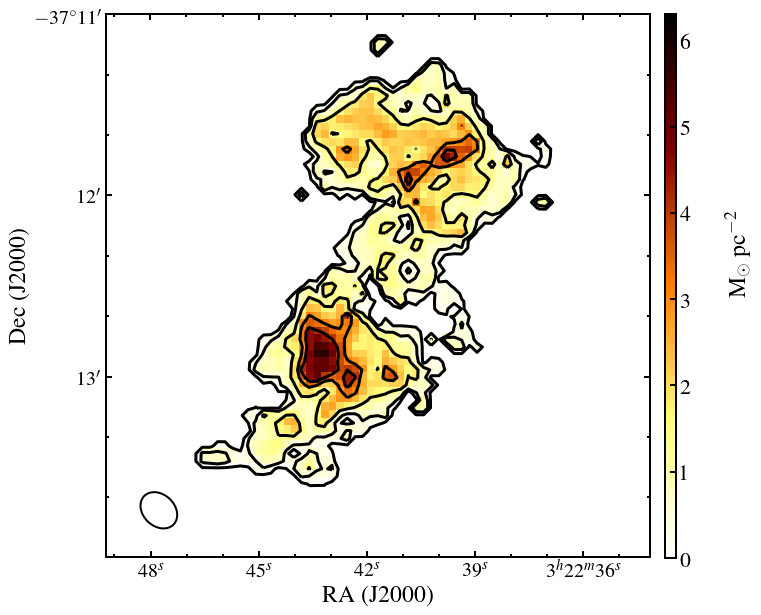

In [30]:
#----------------------#
# surface brightness 20asec
#----------------------#

outPlot_10asec = plotDir+'surfBright_10asec.pdf'
imageName = mhi10asec
fig = plt.figure()

f22 = fits.getdata(imageName, ext=0)
h22 = fits.getheader(imageName, ext=0)

img = plt.imshow(f22, cmap="afmhot_r",vmin=-0.001,vmax=+6.3)
plt.gca().set_visible(False)
cax = plt.axes([0.912, 0.124, 0.015, 0.755])
cbar = plt.colorbar(cax=cax,ticks = [0,1,2,3,4,5,6],
                    orientation='vertical', format='%.0f')
ax = cbar.ax
ax.text(5.8,0.6,r'M$_\odot$ pc$^{-2}$',rotation=90)

f1 = aplpy.FITSFigure(imageName, figure=fig)
f1.set_theme('publication')

f1.frame.set_linewidth(2)

f1.recenter(FA_radeg,FA_decdeg,width=0.05,height=0.05)
f1.show_colorscale(aspect='equal', cmap='afmhot_r',stretch = 'linear',vmin=-0.001,vmax=+6.3)

f1.show_contour(imageName,levels=[0.1,0.5,1.5,3.,4.,6.], colors='black')

f1.show_ellipses(BeamRa, BeamDec, h22['BMAJ'], h22['BMIN'], angle=h22['BPA'], edgecolor='black',linewidth=2 )


f1.axis_labels.set_font( weight='book',size='medium', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')
f1.axis_labels.set_xtext('RA (J2000)')
f1.axis_labels.set_ytext('Dec (J2000)')
f1.tick_labels.set_xformat('hh:mm:ss')
f1.tick_labels.set_yformat('dd:mm')
f1.tick_labels.set_font( weight='book', size='small',
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f1.ticks.set_color('k')
f1.ticks.set_length(6)  # points
f1.ticks.set_linewidth(2)  # points
f1.ticks.set_minor_frequency(3)
f1.ticks.show()

fig.savefig(outPlot_10asec,format='pdf',dpi=300,bbox_inches='tight',transparent=False,overwrite=True)


print('BMAJ\t{0:f}'.format(h22['BMAJ']*3600.))
print('BMIN\t{0:f}'.format(h22['BMIN']*3600.))

print '''\n\t+---------+\n\t NHI 10asec\n\t Done\n\t+---------+'''